<a href="https://colab.research.google.com/github/sbarretthoy/20th-century/blob/main/Exercise%201.7%20Creating%20Network%20Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.2 MB/s eta 0:00:00


In [5]:
!pip install cdlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 60.4 MB/s eta 0:00:00


# 1.7 Network graph visualization

In [6]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

2. Import the country relationships file (that you created in the previous task) as a dataframe in a new notebook.

In [17]:
# Use the 'raw' version of the file to get the actual CSV data
url = 'https://raw.githubusercontent.com/sbarretthoy/20th-century/main/country_relationship.csv'
relationships_df = pd.read_csv(url)

# Print the first few rows to verify the data is loaded correctly
print(relationships_df.head())

   Unnamed: 0    source   target  value
0           0    France    Italy     10
1           1     Italy   Russia      6
2           2   Germany   Russia     26
3           3  Bulgaria  Germany      6
4           4  Bulgaria   Russia      6


3. Create a network object from the countries relationships dataframe.

In [19]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationships_df,
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

#### Graph visualization - Networkx

4. Create a static network graph using only NetworkX.

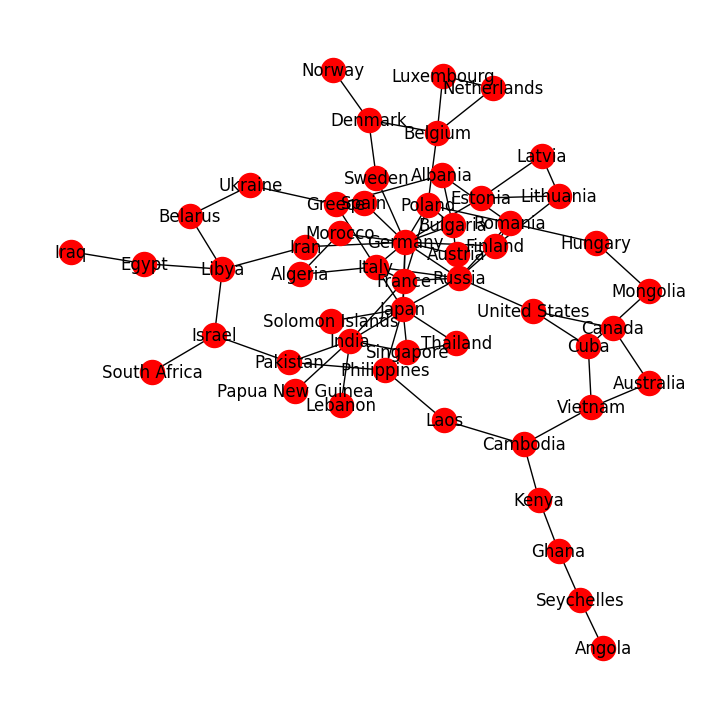

In [20]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

5. Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file

In [21]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

20th_century.html


### Community detection - Leiden algorithm

In [23]:
!pip install leidenalg
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.0 MB/s eta 0:00:00


6. Apply the Leiden algorithm to detect any communities within the countries.

In [60]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [61]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [62]:
new_com = coms.to_node_community_map()

In [63]:
new_com

defaultdict(list,
            {'France': [0],
             'Italy': [0],
             'Russia': [0],
             'Germany': [0],
             'Bulgaria': [0],
             'Austria': [0],
             'Spain': [0],
             'Poland': [0],
             'Finland': [0],
             'Albania': [0],
             'Greece': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Romania': [0],
             'Ukraine': [1],
             'Belarus': [1],
             'Libya': [1],
             'Egypt': [1],
             'Iraq': [1],
             'Pakistan': [1],
             'Israel': [1],
             'South Africa': [1],
             'Iran': [1],
             'Philippines': [2],
             'Laos': [2],
             'Cambodia': [2],
             'Kenya': [2],
             'Ghana': [2],
             'Seychelles': [2],
             'Angola': [2],
             'Hungary': [3],
             'Mongolia': [3],
             'Cuba': [3],
             'United States': [3],
    

In [64]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [65]:
dict_com

{'France': 0,
 'Italy': 0,
 'Russia': 0,
 'Germany': 0,
 'Bulgaria': 0,
 'Austria': 0,
 'Spain': 0,
 'Poland': 0,
 'Finland': 0,
 'Albania': 0,
 'Greece': 0,
 'Morocco': 0,
 'Algeria': 0,
 'Romania': 0,
 'Ukraine': 1,
 'Belarus': 1,
 'Libya': 1,
 'Egypt': 1,
 'Iraq': 1,
 'Pakistan': 1,
 'Israel': 1,
 'South Africa': 1,
 'Iran': 1,
 'Philippines': 2,
 'Laos': 2,
 'Cambodia': 2,
 'Kenya': 2,
 'Ghana': 2,
 'Seychelles': 2,
 'Angola': 2,
 'Hungary': 3,
 'Mongolia': 3,
 'Cuba': 3,
 'United States': 3,
 'Canada': 3,
 'Australia': 3,
 'Vietnam': 3,
 'Japan': 4,
 'Thailand': 4,
 'Singapore': 4,
 'Solomon Islands': 4,
 'India': 4,
 'Papua New Guinea': 4,
 'Lebanon': 4,
 'Belgium': 5,
 'Netherlands': 5,
 'Luxembourg': 5,
 'Denmark': 5,
 'Norway': 5,
 'Sweden': 5,
 'Estonia': 6,
 'Latvia': 6,
 'Lithuania': 6}

7. Visualize the output of the communities algorithm on a new network graph and save it as HTML. Write your observations in a Markdown cell. Does the partition make sense according to history? What other conclusions can you make about the connections between the communities?

In [31]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_Century_communities_leiden.html")

20th_Century_communities_leiden.html


7. comments

### The most important Countries

8. Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise. In the markdown cells underneath, note your observations about the outputs.

In [32]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.11538461538461539,
 'Italy': 0.11538461538461539,
 'Russia': 0.15384615384615385,
 'Germany': 0.25,
 'Bulgaria': 0.07692307692307693,
 'Austria': 0.019230769230769232,
 'Spain': 0.019230769230769232,
 'Poland': 0.09615384615384616,
 'Estonia': 0.057692307692307696,
 'Latvia': 0.038461538461538464,
 'Lithuania': 0.057692307692307696,
 'Finland': 0.07692307692307693,
 'Belgium': 0.07692307692307693,
 'Netherlands': 0.038461538461538464,
 'Luxembourg': 0.038461538461538464,
 'Denmark': 0.057692307692307696,
 'Norway': 0.019230769230769232,
 'Sweden': 0.038461538461538464,
 'Albania': 0.057692307692307696,
 'Greece': 0.057692307692307696,
 'Ukraine': 0.038461538461538464,
 'Belarus': 0.038461538461538464,
 'Libya': 0.07692307692307693,
 'Egypt': 0.038461538461538464,
 'Iraq': 0.019230769230769232,
 'Japan': 0.17307692307692307,
 'Morocco': 0.038461538461538464,
 'Algeria': 0.038461538461538464,
 'Thailand': 0.038461538461538464,
 'Singapore': 0.057692307692307696,
 'Philippine

In [33]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [34]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

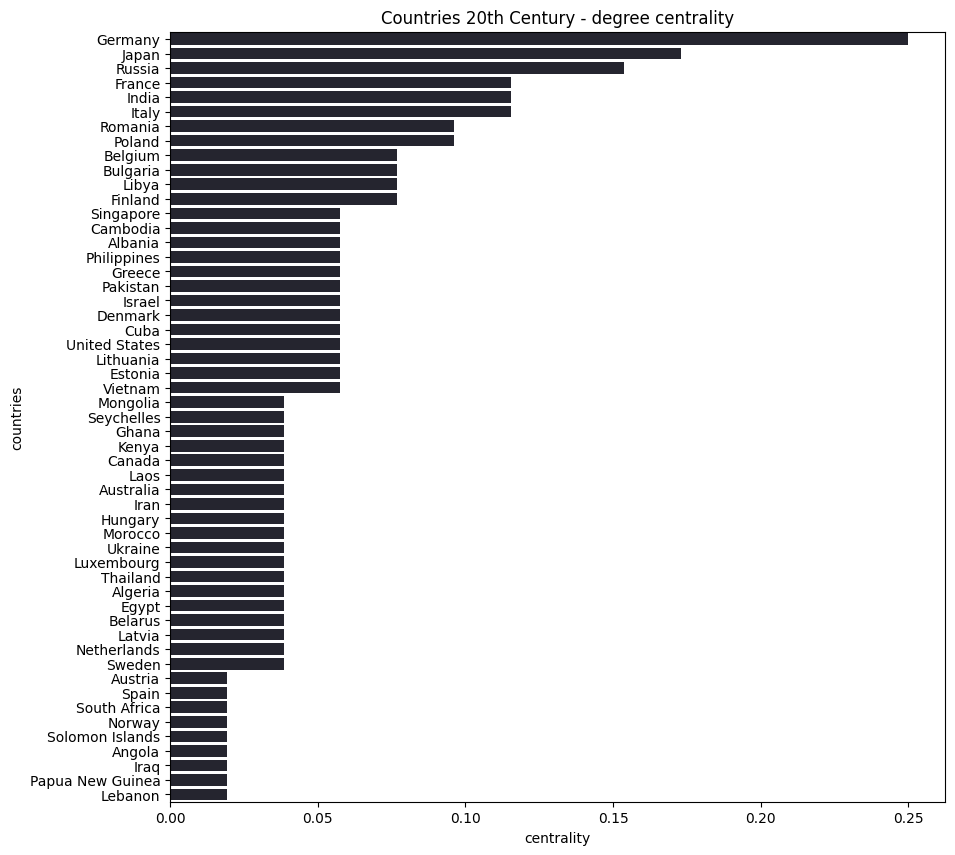

In [36]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("Countries 20th Century - degree centrality")

8. Degree Centrality - I can see that Germany Japan and Russia have high centrality meaning that these countries have connections and are important to the 20th century.

In [37]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [38]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

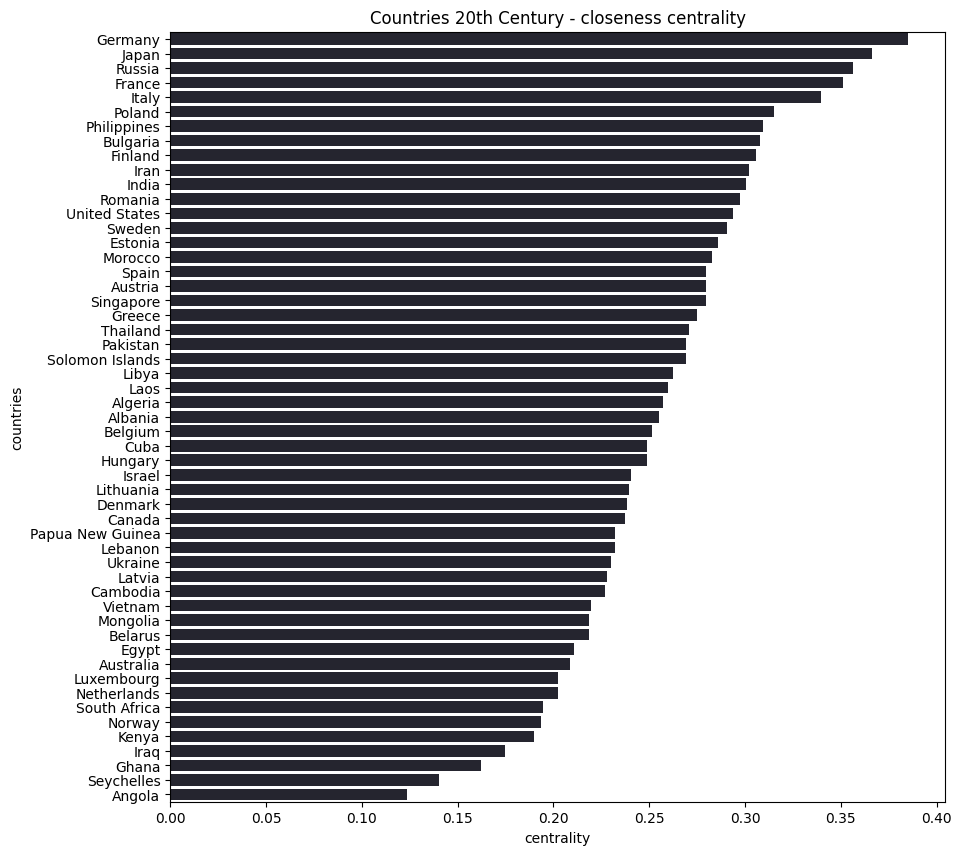

In [40]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("Countries 20th Century - closeness centrality")

8. Closeness Centrality- Germany has the highest closeness centrality meaning it is most sentral and has connections to the other countries. Though many countries have a hihg closeness so this tells me that there are many connections between all countries.

In [41]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [43]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

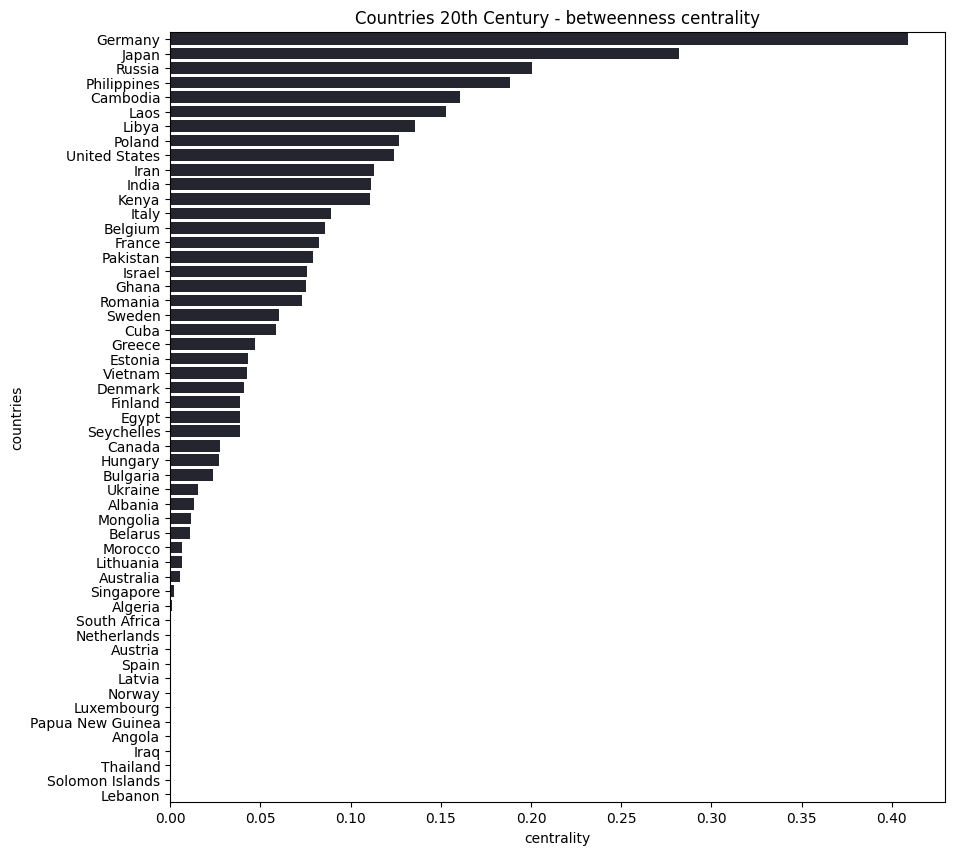

In [46]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("Countries 20th Century - betweenness centrality")

8. Betweeness Centrality - Germany and Japan have the highest scores here which tells me they are the most influential or important countries on the list and hold control in this network.

In [47]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')